## 範例重點
* 學會從 Keras 內建函式取得資料
* 能夠建立簡易的深度學習模型
* 觀察並了解 Overfit 現象

In [1]:
import os
import keras

# 本範例不需使用 GPU, 將 GPU 設定為 "無"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [5]:
# 建立一個有三層隱藏層之神經網路
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)




Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________




In [7]:
# 訓練模型並檢視驗證集的結果
model.fit(x_train, y_train, 
          epochs=100, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 5s 104us/step - loss: 1.9290 - acc: 0.3007 - val_loss: 1.8351 - val_acc: 0.3324
Epoch 2/100
50000/50000 [==============================] - 5s 92us/step - loss: 1.7122 - acc: 0.3858 - val_loss: 1.6578 - val_acc: 0.4141
Epoch 3/100
50000/50000 [==============================] - 4s 86us/step - loss: 1.6109 - acc: 0.4257 - val_loss: 1.5532 - val_acc: 0.4488
Epoch 4/100
50000/50000 [==============================] - 4s 85us/step - loss: 1.5442 - acc: 0.4459 - val_loss: 1.5489 - val_acc: 0.4514
Epoch 5/100
50000/50000 [==============================] - 4s 83us/step - loss: 1.5019 - acc: 0.4646 - val_loss: 1.4973 - val_acc: 0.4650
Epoch 6/100
50000/50000 [==============================] - 4s 88us/step - loss: 1.4627 - acc: 0.4779 - val_loss: 1.4943 - val_acc: 0.4635
Epoch 7/100
50000/50000 [==============================] - 4s 81us/step - loss: 1.4406 - acc: 0.4857 - val_loss: 1.4879 -

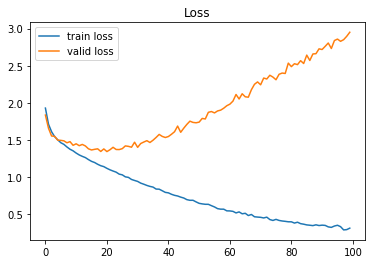

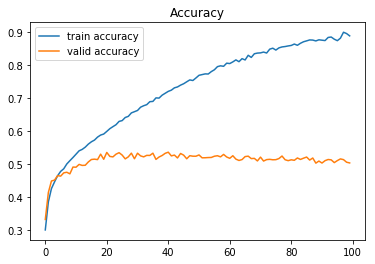

In [9]:
# 以視覺畫方式檢視訓練過程
import matplotlib.pyplot as plt
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

## 作業
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [7]:
# 訓練模型並檢視驗證集的結果
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 11s 216us/step - loss: 1.9382 - acc: 0.2994 - val_loss: 1.7626 - val_acc: 0.3704
Epoch 2/500
50000/50000 [==============================] - 10s 198us/step - loss: 1.7058 - acc: 0.3907 - val_loss: 1.6659 - val_acc: 0.4019
Epoch 3/500
50000/50000 [==============================] - 10s 204us/step - loss: 1.6211 - acc: 0.4219 - val_loss: 1.5978 - val_acc: 0.4296
Epoch 4/500
50000/50000 [==============================] - 10s 195us/step - loss: 1.5549 - acc: 0.4445 - val_loss: 1.5375 - val_acc: 0.4497
Epoch 5/500
50000/50000 [==============================] - 10s 203us/step - loss: 1.5134 - acc: 0.4621 - val_loss: 1.5111 - val_acc: 0.4634
Epoch 6/500
50000/50000 [==============================] - 10s 196us/step - loss: 1.4631 - acc: 0.4802 - val_loss: 1.4749 - val_acc: 0.4791
Epoch 7/500
500

Epoch 55/500
50000/50000 [==============================] - 10s 200us/step - loss: 0.5707 - acc: 0.7944 - val_loss: 1.8814 - val_acc: 0.5105
Epoch 56/500
50000/50000 [==============================] - 10s 205us/step - loss: 0.5569 - acc: 0.8008 - val_loss: 1.9561 - val_acc: 0.5179
Epoch 57/500
50000/50000 [==============================] - 10s 205us/step - loss: 0.5552 - acc: 0.8013 - val_loss: 1.9895 - val_acc: 0.5093
Epoch 58/500
50000/50000 [==============================] - 10s 197us/step - loss: 0.5199 - acc: 0.8151 - val_loss: 2.0144 - val_acc: 0.5124
Epoch 59/500
50000/50000 [==============================] - 10s 209us/step - loss: 0.5239 - acc: 0.8125 - val_loss: 2.0499 - val_acc: 0.5114
Epoch 60/500
50000/50000 [==============================] - 10s 202us/step - loss: 0.5029 - acc: 0.8218 - val_loss: 2.0995 - val_acc: 0.5105
Epoch 61/500
50000/50000 [==============================] - 10s 199us/step - loss: 0.5122 - acc: 0.8166 - val_loss: 2.0806 - val_acc: 0.5030
Epoch 62/500


50000/50000 [==============================] - 9s 190us/step - loss: 0.2256 - acc: 0.9187 - val_loss: 3.3975 - val_acc: 0.5001
Epoch 114/500
50000/50000 [==============================] - 10s 192us/step - loss: 0.2648 - acc: 0.9051 - val_loss: 3.3831 - val_acc: 0.4944
Epoch 115/500
50000/50000 [==============================] - 10s 195us/step - loss: 0.2484 - acc: 0.9104 - val_loss: 3.3717 - val_acc: 0.4968
Epoch 116/500
50000/50000 [==============================] - 9s 188us/step - loss: 0.2741 - acc: 0.9022 - val_loss: 3.4155 - val_acc: 0.4968
Epoch 117/500
50000/50000 [==============================] - 10s 190us/step - loss: 0.2207 - acc: 0.9203 - val_loss: 3.4400 - val_acc: 0.5045
Epoch 118/500
50000/50000 [==============================] - 10s 193us/step - loss: 0.2068 - acc: 0.9263 - val_loss: 3.5330 - val_acc: 0.4956
Epoch 119/500
50000/50000 [==============================] - 10s 191us/step - loss: 0.2454 - acc: 0.9108 - val_loss: 3.4351 - val_acc: 0.5056
Epoch 120/500
50000/50

Epoch 171/500
50000/50000 [==============================] - 10s 197us/step - loss: 0.1336 - acc: 0.9527 - val_loss: 4.2001 - val_acc: 0.4964
Epoch 172/500
50000/50000 [==============================] - 11s 212us/step - loss: 0.1182 - acc: 0.9583 - val_loss: 4.1769 - val_acc: 0.4987
Epoch 173/500
50000/50000 [==============================] - 10s 202us/step - loss: 0.1516 - acc: 0.9475 - val_loss: 4.1949 - val_acc: 0.4987
Epoch 174/500
50000/50000 [==============================] - 10s 204us/step - loss: 0.2022 - acc: 0.9301 - val_loss: 4.3292 - val_acc: 0.4902
Epoch 175/500
50000/50000 [==============================] - 10s 200us/step - loss: 0.2167 - acc: 0.9255 - val_loss: 4.1398 - val_acc: 0.4945
Epoch 176/500
50000/50000 [==============================] - 8s 160us/step - loss: 0.1937 - acc: 0.9315 - val_loss: 4.1833 - val_acc: 0.5016
Epoch 177/500
50000/50000 [==============================] - 10s 191us/step - loss: 0.1417 - acc: 0.9495 - val_loss: 4.2648 - val_acc: 0.4960
Epoch 1

Epoch 229/500
50000/50000 [==============================] - 10s 197us/step - loss: 0.1301 - acc: 0.9545 - val_loss: 4.5941 - val_acc: 0.4997
Epoch 230/500
50000/50000 [==============================] - 10s 196us/step - loss: 0.1534 - acc: 0.9474 - val_loss: 4.5183 - val_acc: 0.4992
Epoch 231/500
50000/50000 [==============================] - 8s 167us/step - loss: 0.0946 - acc: 0.9665 - val_loss: 4.6221 - val_acc: 0.4952
Epoch 232/500
50000/50000 [==============================] - 9s 182us/step - loss: 0.1543 - acc: 0.9474 - val_loss: 4.7035 - val_acc: 0.4936
Epoch 233/500
50000/50000 [==============================] - 10s 199us/step - loss: 0.1736 - acc: 0.9426 - val_loss: 4.4979 - val_acc: 0.5017
Epoch 234/500
50000/50000 [==============================] - 10s 200us/step - loss: 0.1294 - acc: 0.9541 - val_loss: 4.6401 - val_acc: 0.4971
Epoch 235/500
50000/50000 [==============================] - 10s 195us/step - loss: 0.1267 - acc: 0.9563 - val_loss: 4.6432 - val_acc: 0.4958
Epoch 23

50000/50000 [==============================] - 5s 97us/step - loss: 0.2347 - acc: 0.9301 - val_loss: 4.8997 - val_acc: 0.4916
Epoch 288/500
50000/50000 [==============================] - 5s 97us/step - loss: 0.2308 - acc: 0.9304 - val_loss: 4.7754 - val_acc: 0.4934
Epoch 289/500
50000/50000 [==============================] - 5s 98us/step - loss: 0.0698 - acc: 0.9760 - val_loss: 4.8144 - val_acc: 0.4952
Epoch 290/500
50000/50000 [==============================] - 5s 97us/step - loss: 0.0467 - acc: 0.9842 - val_loss: 4.9909 - val_acc: 0.4866
Epoch 291/500
50000/50000 [==============================] - 5s 101us/step - loss: 0.1207 - acc: 0.9591 - val_loss: 5.0055 - val_acc: 0.4874
Epoch 292/500
50000/50000 [==============================] - 5s 99us/step - loss: 0.1829 - acc: 0.9425 - val_loss: 4.8756 - val_acc: 0.4978
Epoch 293/500
50000/50000 [==============================] - 5s 98us/step - loss: 0.1120 - acc: 0.9612 - val_loss: 4.8423 - val_acc: 0.4955
Epoch 294/500
50000/50000 [======

50000/50000 [==============================] - 5s 99us/step - loss: 0.1773 - acc: 0.9456 - val_loss: 4.9711 - val_acc: 0.4945
Epoch 346/500
50000/50000 [==============================] - 5s 101us/step - loss: 0.1656 - acc: 0.9475 - val_loss: 4.9722 - val_acc: 0.5018
Epoch 347/500
50000/50000 [==============================] - 5s 103us/step - loss: 0.0942 - acc: 0.9682 - val_loss: 5.0432 - val_acc: 0.5001
Epoch 348/500
50000/50000 [==============================] - 5s 104us/step - loss: 0.0574 - acc: 0.9816 - val_loss: 5.0285 - val_acc: 0.4936
Epoch 349/500
50000/50000 [==============================] - 5s 98us/step - loss: 0.0547 - acc: 0.9812 - val_loss: 5.0625 - val_acc: 0.4973
Epoch 350/500
50000/50000 [==============================] - 5s 98us/step - loss: 0.0845 - acc: 0.9717 - val_loss: 5.1059 - val_acc: 0.4947
Epoch 351/500
50000/50000 [==============================] - 6s 126us/step - loss: 0.1344 - acc: 0.9573 - val_loss: 5.2163 - val_acc: 0.4831
Epoch 352/500
50000/50000 [===

Epoch 403/500
50000/50000 [==============================] - 10s 202us/step - loss: 0.0631 - acc: 0.9788 - val_loss: 5.2357 - val_acc: 0.4919
Epoch 404/500
50000/50000 [==============================] - 10s 208us/step - loss: 0.0926 - acc: 0.9691 - val_loss: 5.1690 - val_acc: 0.4885
Epoch 405/500
50000/50000 [==============================] - 11s 211us/step - loss: 0.0946 - acc: 0.9694 - val_loss: 5.1240 - val_acc: 0.4985
Epoch 406/500
50000/50000 [==============================] - 10s 201us/step - loss: 0.0634 - acc: 0.9786 - val_loss: 5.1685 - val_acc: 0.4945
Epoch 407/500
50000/50000 [==============================] - 8s 160us/step - loss: 0.1002 - acc: 0.9674 - val_loss: 5.1588 - val_acc: 0.4909
Epoch 408/500
50000/50000 [==============================] - 10s 202us/step - loss: 0.0713 - acc: 0.9763 - val_loss: 5.0915 - val_acc: 0.5025
Epoch 409/500
50000/50000 [==============================] - 10s 200us/step - loss: 0.0619 - acc: 0.9794 - val_loss: 5.1812 - val_acc: 0.4914
Epoch 4

Epoch 461/500
50000/50000 [==============================] - 10s 200us/step - loss: 0.0677 - acc: 0.9777 - val_loss: 5.3644 - val_acc: 0.4938
Epoch 462/500
50000/50000 [==============================] - 11s 213us/step - loss: 0.0894 - acc: 0.9710 - val_loss: 5.3401 - val_acc: 0.4884
Epoch 463/500
50000/50000 [==============================] - 8s 159us/step - loss: 0.1113 - acc: 0.9647 - val_loss: 5.3547 - val_acc: 0.4854
Epoch 464/500
50000/50000 [==============================] - 10s 201us/step - loss: 0.0563 - acc: 0.9810 - val_loss: 5.3639 - val_acc: 0.4926
Epoch 465/500
50000/50000 [==============================] - 10s 205us/step - loss: 0.0355 - acc: 0.9881 - val_loss: 5.3458 - val_acc: 0.4935
Epoch 466/500
50000/50000 [==============================] - 10s 202us/step - loss: 0.0614 - acc: 0.9796 - val_loss: 5.3608 - val_acc: 0.4929
Epoch 467/500
50000/50000 [==============================] - 10s 201us/step - loss: 0.0790 - acc: 0.9741 - val_loss: 5.2637 - val_acc: 0.4990
Epoch 4

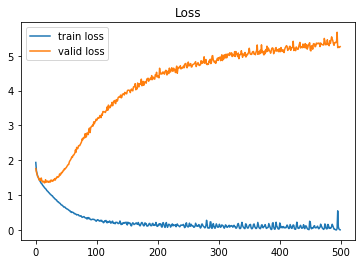

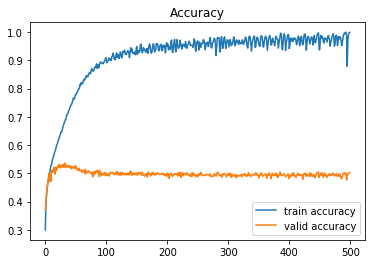

In [9]:
# 以視覺畫方式檢視訓練過程
import matplotlib.pyplot as plt
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [10]:
model2 = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model2.summary()

optimizer = keras.optimizers.SGD(lr=0.001)
model2.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
# 訓練模型並檢視驗證集的結果
model2.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 8s 165

Epoch 52/500
50000/50000 [==============================] - 7s 137us/step - loss: 1.6766 - acc: 0.4169 - val_loss: 1.6886 - val_acc: 0.4089
Epoch 53/500
50000/50000 [==============================] - 7s 140us/step - loss: 1.6735 - acc: 0.4187 - val_loss: 1.6787 - val_acc: 0.4122
Epoch 54/500
50000/50000 [==============================] - 7s 139us/step - loss: 1.6702 - acc: 0.4204 - val_loss: 1.6776 - val_acc: 0.4119
Epoch 55/500
50000/50000 [==============================] - 7s 140us/step - loss: 1.6670 - acc: 0.4206 - val_loss: 1.6729 - val_acc: 0.4150
Epoch 56/500
50000/50000 [==============================] - 7s 140us/step - loss: 1.6637 - acc: 0.4224 - val_loss: 1.6710 - val_acc: 0.4113
Epoch 57/500
50000/50000 [==============================] - 7s 138us/step - loss: 1.6606 - acc: 0.4224 - val_loss: 1.6654 - val_acc: 0.4142
Epoch 58/500
50000/50000 [==============================] - 7s 141us/step - loss: 1.6575 - acc: 0.4236 - val_loss: 1.6638 - val_acc: 0.4210
Epoch 59/500
50000/5

50000/50000 [==============================] - 7s 140us/step - loss: 1.5316 - acc: 0.4668 - val_loss: 1.5537 - val_acc: 0.4507
Epoch 111/500
50000/50000 [==============================] - 7s 142us/step - loss: 1.5297 - acc: 0.4681 - val_loss: 1.5507 - val_acc: 0.4555
Epoch 112/500
50000/50000 [==============================] - 7s 139us/step - loss: 1.5277 - acc: 0.4690 - val_loss: 1.5588 - val_acc: 0.4501
Epoch 113/500
50000/50000 [==============================] - 7s 130us/step - loss: 1.5254 - acc: 0.4691 - val_loss: 1.5502 - val_acc: 0.4541
Epoch 114/500
50000/50000 [==============================] - 5s 104us/step - loss: 1.5236 - acc: 0.4698 - val_loss: 1.5456 - val_acc: 0.4576
Epoch 115/500
50000/50000 [==============================] - 7s 140us/step - loss: 1.5214 - acc: 0.4706 - val_loss: 1.5496 - val_acc: 0.4603
Epoch 116/500
50000/50000 [==============================] - 7s 138us/step - loss: 1.5196 - acc: 0.4710 - val_loss: 1.5437 - val_acc: 0.4597
Epoch 117/500
50000/50000 [

50000/50000 [==============================] - 7s 142us/step - loss: 1.4312 - acc: 0.5009 - val_loss: 1.4789 - val_acc: 0.4798
Epoch 169/500
50000/50000 [==============================] - 7s 142us/step - loss: 1.4287 - acc: 0.5005 - val_loss: 1.4742 - val_acc: 0.4834
Epoch 170/500
50000/50000 [==============================] - 7s 140us/step - loss: 1.4277 - acc: 0.5009 - val_loss: 1.4756 - val_acc: 0.4810
Epoch 171/500
50000/50000 [==============================] - 7s 138us/step - loss: 1.4264 - acc: 0.5018 - val_loss: 1.4748 - val_acc: 0.4786
Epoch 172/500
50000/50000 [==============================] - 7s 141us/step - loss: 1.4246 - acc: 0.5029 - val_loss: 1.4754 - val_acc: 0.4804
Epoch 173/500
50000/50000 [==============================] - 7s 140us/step - loss: 1.4231 - acc: 0.5034 - val_loss: 1.4748 - val_acc: 0.4813
Epoch 174/500
50000/50000 [==============================] - 7s 141us/step - loss: 1.4216 - acc: 0.5029 - val_loss: 1.4747 - val_acc: 0.4836
Epoch 175/500
50000/50000 [

50000/50000 [==============================] - 7s 136us/step - loss: 1.3469 - acc: 0.5282 - val_loss: 1.4200 - val_acc: 0.4986
Epoch 227/500
50000/50000 [==============================] - 7s 137us/step - loss: 1.3456 - acc: 0.5290 - val_loss: 1.4337 - val_acc: 0.4965
Epoch 228/500
50000/50000 [==============================] - 7s 141us/step - loss: 1.3441 - acc: 0.5294 - val_loss: 1.4247 - val_acc: 0.4951
Epoch 229/500
50000/50000 [==============================] - 7s 141us/step - loss: 1.3422 - acc: 0.5302 - val_loss: 1.4402 - val_acc: 0.4884
Epoch 230/500
50000/50000 [==============================] - 7s 140us/step - loss: 1.3414 - acc: 0.5313 - val_loss: 1.4198 - val_acc: 0.5009
Epoch 231/500
50000/50000 [==============================] - 7s 144us/step - loss: 1.3397 - acc: 0.5324 - val_loss: 1.4201 - val_acc: 0.5000
Epoch 232/500
50000/50000 [==============================] - 7s 147us/step - loss: 1.3385 - acc: 0.5316 - val_loss: 1.4191 - val_acc: 0.4953
Epoch 233/500
50000/50000 [

50000/50000 [==============================] - 7s 141us/step - loss: 1.2739 - acc: 0.5544 - val_loss: 1.3879 - val_acc: 0.5095
Epoch 285/500
50000/50000 [==============================] - 7s 144us/step - loss: 1.2716 - acc: 0.5549 - val_loss: 1.3955 - val_acc: 0.5061
Epoch 286/500
50000/50000 [==============================] - 7s 139us/step - loss: 1.2702 - acc: 0.5565 - val_loss: 1.3930 - val_acc: 0.5086
Epoch 287/500
50000/50000 [==============================] - 7s 145us/step - loss: 1.2689 - acc: 0.5556 - val_loss: 1.3801 - val_acc: 0.5095
Epoch 288/500
50000/50000 [==============================] - 7s 142us/step - loss: 1.2676 - acc: 0.5587 - val_loss: 1.3884 - val_acc: 0.5053
Epoch 289/500
50000/50000 [==============================] - 6s 130us/step - loss: 1.2660 - acc: 0.5570 - val_loss: 1.3799 - val_acc: 0.5113
Epoch 290/500
50000/50000 [==============================] - 5s 102us/step - loss: 1.2660 - acc: 0.5572 - val_loss: 1.3927 - val_acc: 0.5061
Epoch 291/500
50000/50000 [

50000/50000 [==============================] - 7s 149us/step - loss: 1.2056 - acc: 0.5789 - val_loss: 1.3533 - val_acc: 0.5180
Epoch 343/500
50000/50000 [==============================] - 5s 102us/step - loss: 1.2055 - acc: 0.5792 - val_loss: 1.3924 - val_acc: 0.5037
Epoch 344/500
50000/50000 [==============================] - 7s 146us/step - loss: 1.2037 - acc: 0.5795 - val_loss: 1.3800 - val_acc: 0.5117
Epoch 345/500
50000/50000 [==============================] - 8s 151us/step - loss: 1.2028 - acc: 0.5798 - val_loss: 1.3836 - val_acc: 0.5045
Epoch 346/500
50000/50000 [==============================] - 7s 146us/step - loss: 1.2019 - acc: 0.5792 - val_loss: 1.3650 - val_acc: 0.5129
Epoch 347/500
50000/50000 [==============================] - 7s 145us/step - loss: 1.2014 - acc: 0.5802 - val_loss: 1.3630 - val_acc: 0.5135
Epoch 348/500
50000/50000 [==============================] - 7s 150us/step - loss: 1.1995 - acc: 0.5801 - val_loss: 1.3630 - val_acc: 0.5161
Epoch 349/500
50000/50000 [

50000/50000 [==============================] - 3s 65us/step - loss: 1.1443 - acc: 0.6001 - val_loss: 1.3578 - val_acc: 0.5153
Epoch 401/500
50000/50000 [==============================] - 3s 68us/step - loss: 1.1428 - acc: 0.6015 - val_loss: 1.3474 - val_acc: 0.5180
Epoch 402/500
50000/50000 [==============================] - 3s 70us/step - loss: 1.1412 - acc: 0.5999 - val_loss: 1.3529 - val_acc: 0.5230
Epoch 403/500
50000/50000 [==============================] - 3s 65us/step - loss: 1.1407 - acc: 0.6015 - val_loss: 1.3583 - val_acc: 0.5152
Epoch 404/500
50000/50000 [==============================] - 3s 65us/step - loss: 1.1387 - acc: 0.6014 - val_loss: 1.3444 - val_acc: 0.5162
Epoch 405/500
50000/50000 [==============================] - 3s 67us/step - loss: 1.1369 - acc: 0.6028 - val_loss: 1.3874 - val_acc: 0.5045
Epoch 406/500
50000/50000 [==============================] - 3s 68us/step - loss: 1.1375 - acc: 0.6016 - val_loss: 1.3449 - val_acc: 0.5181
Epoch 407/500
50000/50000 [=======

50000/50000 [==============================] - 3s 65us/step - loss: 1.0845 - acc: 0.6221 - val_loss: 1.3550 - val_acc: 0.5181
Epoch 459/500
50000/50000 [==============================] - 3s 67us/step - loss: 1.0841 - acc: 0.6213 - val_loss: 1.3729 - val_acc: 0.5112
Epoch 460/500
50000/50000 [==============================] - 3s 66us/step - loss: 1.0810 - acc: 0.6215 - val_loss: 1.3498 - val_acc: 0.5205
Epoch 461/500
50000/50000 [==============================] - 3s 66us/step - loss: 1.0808 - acc: 0.6238 - val_loss: 1.3416 - val_acc: 0.5222
Epoch 462/500
50000/50000 [==============================] - 3s 67us/step - loss: 1.0801 - acc: 0.6228 - val_loss: 1.3433 - val_acc: 0.5224
Epoch 463/500
50000/50000 [==============================] - 3s 65us/step - loss: 1.0779 - acc: 0.6231 - val_loss: 1.4170 - val_acc: 0.5028
Epoch 464/500
50000/50000 [==============================] - 3s 64us/step - loss: 1.0771 - acc: 0.6244 - val_loss: 1.3338 - val_acc: 0.5267
Epoch 465/500
50000/50000 [=======

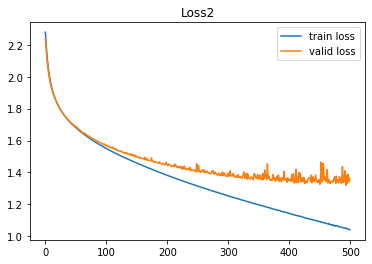

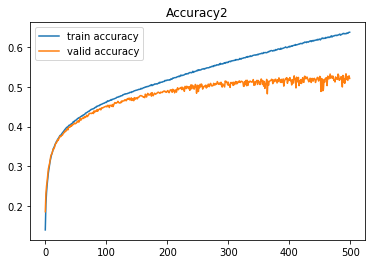

In [11]:
# 以視覺畫方式檢視訓練過程
import matplotlib.pyplot as plt
train_loss2 = model2.history.history["loss"]
valid_loss2 = model2.history.history["val_loss"]

train_acc2 = model2.history.history["acc"]
valid_acc2 = model2.history.history["val_acc"]

plt.plot(range(len(train_loss2)), train_loss2, label="train loss")
plt.plot(range(len(valid_loss2)), valid_loss2, label="valid loss")
plt.legend()
plt.title("Loss2")
plt.show()

plt.plot(range(len(train_acc2)), train_acc2, label="train accuracy")
plt.plot(range(len(valid_acc2)), valid_acc2, label="valid accuracy")
plt.legend()
plt.title("Accuracy2")
plt.show()